# Multiple linear regression


### Dummy variable trap

আমরা দেখেছি যে যখন আমাদের কোন column কে numerical করতে হত আর সেখানে যদি multiple data থাকত আমরা dummy variable use করি।

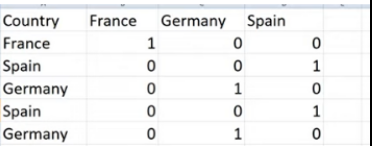


In multiple linear regression we know,
y=b0 + b1*x1 + b2*x2 + b3*x3 + ... ???

Now,a scenario in which two or more variables are highly correlated মানে হল একটা অন্যটা কে predict করতে পারে।
in other words one vaariable can be predicted from the others.
ধরি,
আমার কাছে দুইটা dummy variable আছে।যদি আমি দুইটাকে equation এর মধ্যে আনি তাহলে model বুঝবে না। কোনটা কী ।Because there only 0 and 1.
So in equation there will be 0 and 1. And when 0 means one variable and when 1 means again this variable or others , model can not distinguish.
This is dummy variable trap.

এখন এটা দূর করার জন্য আমরা একটা way use করি।

if a categorial variable can take on n values,i only need (n-1) dummy variables.
n টা dummy variable থাকলে যেকোনো (n-1) টা নিব।

### 5 methods of building models

Why i need: 
***
        
        Machine learning এ most important things হচ্ছে algorithm and data.Algorithm is like a body and data is like a soul.এখন আমার machine learning model কেমন কাজ করবে 
        সেটা accuracy কিরকম সেটা DEPEND করে আমার data এর উপর।এখন real life data যেগুলা আছে তার অবস্থা খুবই খারাপ।মানে আমরা যেরকম data expect করি সেটা পাই না। 
        তো এদের আমরা RAW DATA বলতে পাড়ী।Also internet data are also not good at all.
        To fixed this raw data we use this.That is also called feature engineering.এতে করে আমরা data কে clean করতে পারি and clean data apply
        করে আমাদের মডেল এর accuracy বাড়াতে পারি।For an example: Let say My result is published .
        In this there are my mother name,brother name,father name my name ,birth,class my father work
        etc given it will be raw data.CZ i only need my marks of every subject not my identity .Here we need to clean.
        Clean করার জন্য আমাদের domain knowledge(like teacher) রাখতে হয়।Visualization দিয়েও করা যায়(pen price).


1.All-in=> ready made.

2.Backward Elimination=>
                        
                        Step 1: Select a significance level to stay in the model (Eg: SL=0.05).

                        Step 2: Fit the full model with the possible predictors.

                        Step 3: Consider the predictor with the highest p-value. If P>SL, go to step 4 otherwise your model is completed.

                        Step 4: Remove the predictor
                        
                        Step 5: Fit models without this variable and move to step 3.

3.Forward selection=>
                       
                        Step 1: Select a significance level to enter in the model (Eg: SL=0.05)

                        Step 2: Fit all Simple Regression models y ~ Xn, select the one with the lowest p-value.
                                (single single variable নিয়ে কাজ করে lowest p-value যেটার সে variable pick করব।
        
                        Step 3: Keep the variable and fit all possible models with one extra predictor added to the one(s) you already have.
                                (আগের step এ যে lowest p-value এর variable ছিল সেটা অন্য variable এর সাথে add করে আবার model design এ fit করব )
                
                        Step 4: Consider the predictor with the lowest p-value. If p-value < SL, go to Step3, else the model is completed.
        
4.Bidirectional Elimination=>
                        
                        Step 1: Select a significance level to stay in the model (Eg: SLENT=0.05, SLSTAY=0.05)

                        Step 2: Perform the next step of forward selection (new variables must have p-value<SLENTT to enter)

                        Step 3: Perform all steps of backward elimination (old variables must have p-value<SLSTAY to stay) repeat step 2 and 3 until no new variables than move to step 5.

                        Step 4: If no new variables can enter and no variables can exit, so it is the final model.
                        
5.Score Comparison=>  
                        
                        step 1: select a criterion of goodness of fit.

                        step 2: construct all possible regression models:2^N-1 total combinations

                        srep 3: select the one with the best criterion

2,3,4=> stepwise regression বলা হয়।

All Possible Models

 Step 1: Select the criterion of the goodness of fit.

 Step 2: Construct all possible regression models 2N−12 −1 total combinations.

 Step 3: Select one with the best criterion

কিন্তু কেউ যদি বলে stepwise regression then by default, it is bidirectional Elimination. 

# Implementation

### Model statement

This model is to understand what startup will have much profit.
We wiil build a model and apply some startup for understand what will be more profitable

### Import libraries
***

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Getting dataset
***

In [ ]:
dataset=pd.read_csv("50_Startups.csv")

In [ ]:
dataset

### importing datasets
***

In [ ]:
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

In [ ]:
print(x)

In [ ]:
print(y)

### Finding missing values
***

### Encoding Catagorical Data
***

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[3])],remainder='passthrough')
x=ct.fit_transform(x)

### Splitting dataset into Training & Test set
***

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=.2,random_state=0)

### Feature Scaling
***

In multiple linear regression,There is no need of feature scaling bcz of the coefficient.
And multiple linear regression model class can avoid dummy trap and features so we don't need to worry about dummy trap and feature



### Training the multiple linear regression  model on the Training set
***

In [ ]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,Y_train)

### Predicting the Test set results
***

In [ ]:
y_pred=regressor.predict(X_test)

In [ ]:
print(y_pred)

In [ ]:
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), Y_test.reshape(len(Y_test),1)),1))

### Model accuracy
***

In [ ]:
from sklearn.metrics import r2_score
r2_score(Y_test,y_pred)